# A. Problem Statement

An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

# B. Project Objective

The objective of this project is to group the customers according to their purchase behaviour so that store can plan out different strategies for different customers.

# C. Data Discription

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('OnlineRetail (3).csv',encoding='unicode_escape')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# D. Data Pre-processing Steps and Inspiration
The Pre-processing of the data includes the following steps:

Data Cleaning: Cleaning the data by removing missing values and other inconsistencies.
Data Exploration: Exploring the data to gain insights and understanding the data.
Data Visualization: Visualizing the data for better understanding.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Since our analysis is focused on customer segmentation, records without CustomerID cannot be used for clustering

In [7]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

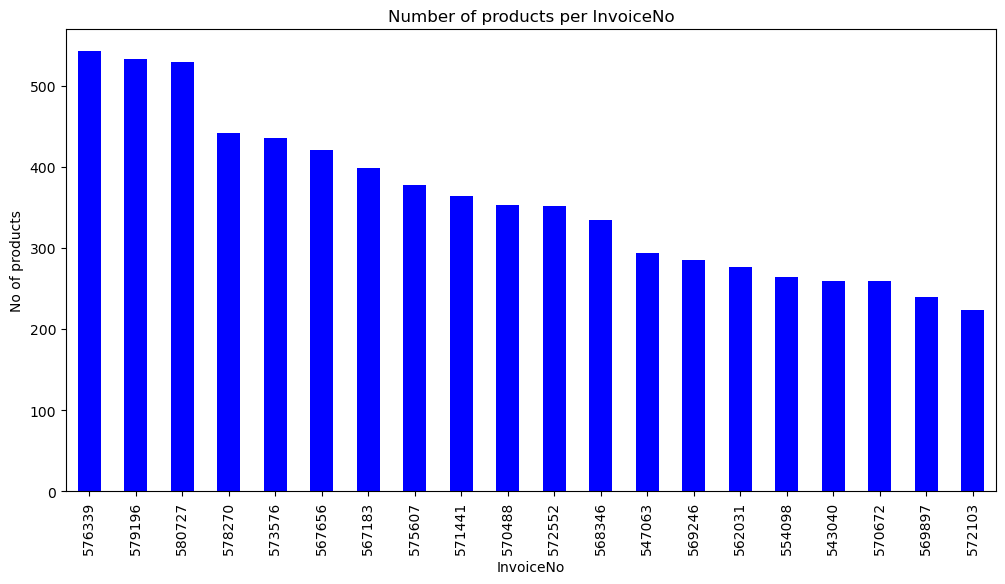

In [11]:
plt.figure(figsize=(12, 6))
customer_count = df.groupby('InvoiceNo')['Description'].count().nlargest(20)
customer_count.plot(kind='bar', color='blue')
plt.xlabel('InvoiceNo')
plt.ylabel('No of products')
plt.title('Number of products per InvoiceNo')
plt.xticks(rotation=90)
plt.show()

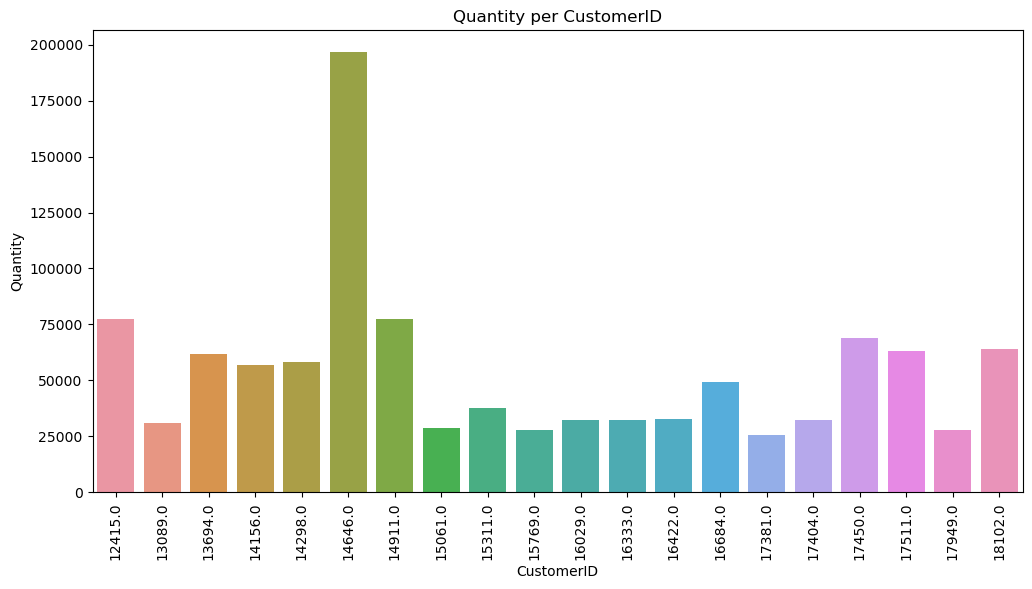

In [10]:
top_CustomerID_quantity = df.groupby('CustomerID')['Quantity'].sum().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_CustomerID_quantity.index, y=top_CustomerID_quantity.values)
plt.xticks(rotation=90)
plt.title("Quantity per CustomerID")
plt.xlabel("CustomerID")
plt.ylabel("Quantity")
plt.show()

In [26]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [13]:
customer_df = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'TotalPrice': 'sum',  'Quantity': 'sum'  }).reset_index()


In [14]:
customer_df

,CustomerID,InvoiceNo,TotalPrice,Quantity
0,12346.0,2,0.00,0
1,12347.0,7,4310.00,2458
2,12348.0,4,1797.24,2341
3,12349.0,1,1757.55,631
4,12350.0,1,334.40,197
...,...,...,...,...
4367,18280.0,1,180.60,45
4368,18281.0,1,80.82,54
4369,18282.0,3,176.60,98
4370,18283.0,16,2094.88,1397


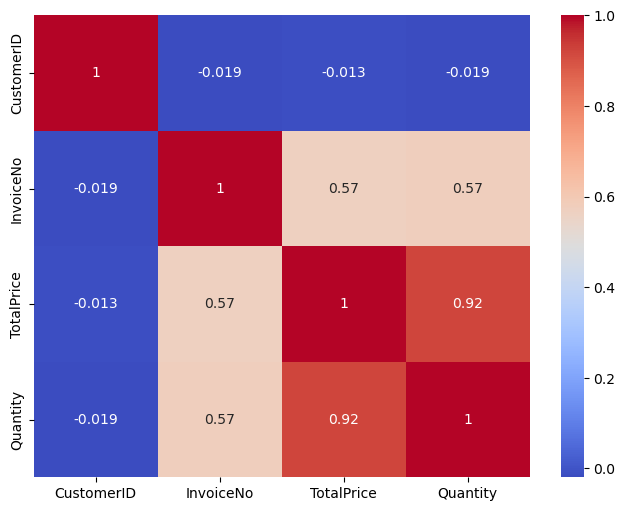

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Observations from the heatmap:

1. CustomerId has no correlation with other features.

2. Invoice and TotalPrice have a moderate positive correlation of 0.57, suggesting that customers with more transactions tend to have a higher total spending.

3. TotalPrice and Quantity have a very strong positive correlation of 0.92, indicating that as the quantity of products purchased increases, the total price tends to increase as well.

4. TransactionCount and Quantity also have a moderate positive correlation of 0.57, implying that customers who buy more items also tend to make more transactions

In [17]:
scaler = StandardScaler() # standardizing the data 

In [18]:
numerical_features = ['InvoiceNo', 'TotalPrice', 'Quantity']

In [19]:
customer_df[numerical_features] = scaler.fit_transform(customer_df[numerical_features])

In [20]:
customer_df.head()

,CustomerID,InvoiceNo,TotalPrice,Quantity
0,12346.0,-0.329362,-0.231001,-0.240215
1,12347.0,0.206102,0.293432,0.285870
2,12348.0,-0.115176,-0.012316,0.260828
3,12349.0,-0.436455,-0.017146,-0.105162
4,12350.0,-0.436455,-0.190312,-0.198051


# E. Choosing the Algorithm for the Project

The choice of algorithm for a machine learning project is depends upon the type of problem we are trying to solve. Generally, supervised learning algorithms are used for classification and regression problems, while unsupervised learning algorithms are used for clustering and dimensionality reduction tasks. Some popular algorithm used for customer segmentation are K means clustering , Heirarchical Clustering, DBscan etc.

In [21]:
from sklearn.cluster import KMeans

In [22]:
inertia = []
range_values = range(1, 10)

In [27]:
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_df[numerical_features])
    inertia.append(kmeans.inertia_)

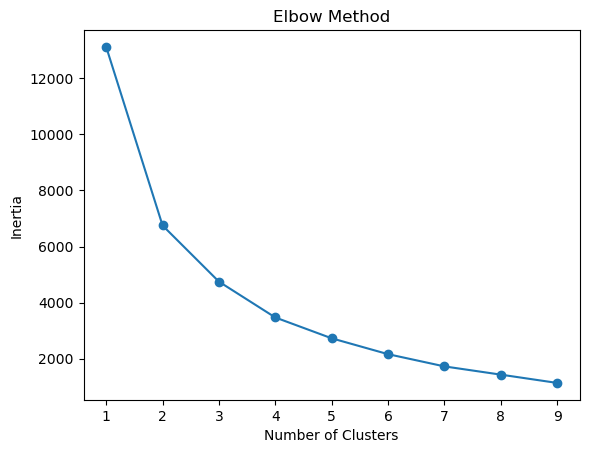

In [24]:
plt.plot(range_values, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
kmeans = KMeans(n_clusters= 3, random_state=42)
kmeans.fit(customer_df[numerical_features])

KMeans(n_clusters=3, random_state=42)

In [36]:
customer_df['Cluster'] = kmeans.labels_

In [37]:
print(customer_df['Cluster'].value_counts())

1    4326
0      41
2       5
Name: Cluster, dtype: int64


In [38]:
cluster_analysis = customer_df.groupby('Cluster')[numerical_features].mean()
print(cluster_analysis)

         InvoiceNo  TotalPrice   Quantity
Cluster                                  
0         5.803666    4.131861   4.665578
1        -0.065962   -0.066449  -0.067901
2         9.480349   23.610797  20.490326


# F. Motivation and Reasons For Choosing the Algorithm¶

Here we could have used K means or heirarchical clustering.But as the data set is large we prefer to go with k Means clustering. Since we are using more than 2 features we are using PCA to reduce to 2D for visualization purposes

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
customer_df['pc1'], customer_df['pc2'] = zip(*pca.fit_transform(customer_df[numerical_features]))

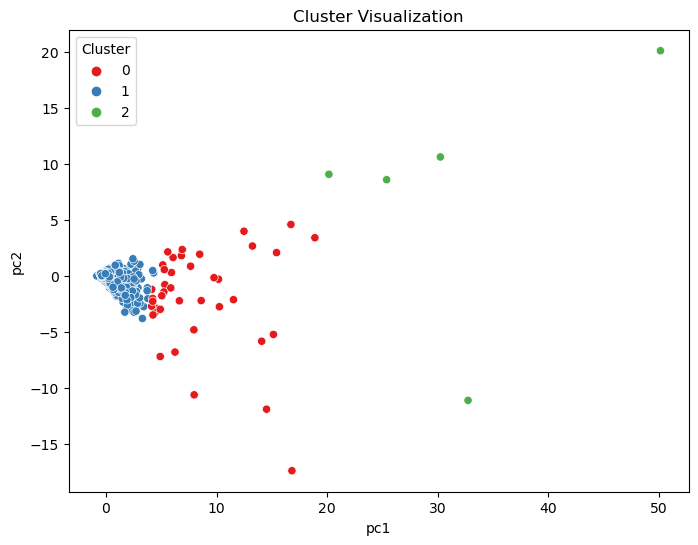

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=customer_df, palette='Set1')
plt.title('Cluster Visualization')
plt.show()

# G. Inferences from the Same

1. Customers in Cluster 0 are the core customer group with average spending habits and might be targeted with general marketing strategies.

2. Customers in Cluster 1 are valuable with potentially higher spending and may be responsive to promotional activities.

3. Customers in Cluster 2 are likely the most valuable and could possibly be the focus of premium services, exclusive offers.


# H.Future Possibilities of the Project

This customer segmentation in all possibilities is going to help the retail shop to understand their customer and strategise their marketing accordingly. In future with more data avalaibility we could use the RMFT model for enhancement.